# Introduction and Overview of the Startup Success Prediction Project


## Project Background
Entrepreneurship is risky, and many startups fail early on. Figuring out why they succeed or fail helps investors, entrepreneurs, and policymakers make better decisions. Predicting success early can help use resources better, lower financial risks, and boost the number of successful startups.

## Project Objective
The main objective of this project is to develop a predictive model that can accurately forecast the likelihood of a startup's success based on various factors derived from historical data. The success of a company is defined as the event that gives the company's founders a large sum of money through the process of M&A (Merger and Acquisition) or an IPO (Initial Public Offering). A company would be considered as failed if it had to be shut down.

# Data Inspection 


## Importing the required libraries


In [378]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import date
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from datetime import datetime


import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

## Data Importation 

In [379]:
data = pd.read_csv('../input/startup-success-prediction/startup data.csv')

In [343]:
data.head()


,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


## EDA & Preliminary insights of our data : 

In [345]:
print(data.isnull().sum())


Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [346]:
print("Percentage of missing values in 'closed_at' column: % {:.2f}". format((data.closed_at.isnull().sum())/len(data)*100))
print("Percentage of missing values in 'Unnamed: 6' column: % {:.2f}". format((data["Unnamed: 6"].isnull().sum())/len(data)*100))
print("Percentage of missing values in 'age_last_milestone_year' column  : % {:.2f}". format((data.age_last_milestone_year.isnull().sum())/len(data)*100))
print("percentage of missing values in 'age_first_milestone_year' column : % {:.2f}". format((data.age_first_milestone_year.isnull().sum())/len(data)*100))

Percentage of missing values in 'closed_at' column: % 63.71
Percentage of missing values in 'Unnamed: 6' column: % 53.41
Percentage of missing values in 'age_last_milestone_year' column  : % 16.47
percentage of missing values in 'age_first_milestone_year' column : % 16.47


NB : For closed_at, the missing values might imply that the startup is still operational, which is an important insight

In [381]:
# Fill missing values for 'age_first_milestone_year' and 'age_last_milestone_year' with median
data['age_first_milestone_year'] = data['age_first_milestone_year'].fillna(value="0")
data['age_last_milestone_year'] = data['age_last_milestone_year'].fillna(value="0")


In [382]:
data.drop(['Unnamed: 0', 'Unnamed: 6', 'state_code.1', 'object_id','labels'], axis=1, inplace=True)


In [385]:
data['age_first_milestone_year'] = data.age_first_milestone_year.astype(float)
data['age_last_milestone_year'] = data.age_last_milestone_year.astype(float)

In [386]:
data=data.drop(data[data.age_first_funding_year<0].index)
data=data.drop(data[data.age_last_funding_year<0].index)
data=data.drop(data[data.age_first_milestone_year<0].index)
data=data.drop(data[data.age_last_milestone_year<0].index)

In [387]:
data.duplicated().sum()


0

In [388]:
print(data.isnull().sum())


state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
name                          0
founded_at                    0
closed_at                   544
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year      0
age_last_milestone_year       0
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecomm

In [389]:
data['founded_at'] = pd.to_datetime(data['founded_at'])
data['closed_at'] = pd.to_datetime(data['closed_at'])

data['first_funding_at'] = pd.to_datetime(data['first_funding_at'])
data['last_funding_at'] = pd.to_datetime(data['last_funding_at'])
data

,state_code,latitude,longitude,zip_code,id,city,name,founded_at,closed_at,first_funding_at,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,92101,c:6669,San Diego,Bandsintown,2007-01-01,NaT,2009-04-01,...,1,0,1,0,0,0,0,1.0000,0,acquired
1,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,TriCipher,2000-01-01,NaT,2005-02-14,...,0,1,0,0,1,1,1,4.7500,1,acquired
2,CA,32.901049,-117.192656,92121,c:65620,San Diego,Plixi,2009-03-18,NaT,2010-03-30,...,0,0,0,1,0,0,0,4.0000,1,acquired
3,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Solidcore Systems,2002-01-01,NaT,2005-02-17,...,0,0,0,0,1,1,1,3.3333,1,acquired
4,CA,37.779281,-122.419236,94105,c:65806,San Francisco,Inhale Digital,2010-08-01,2012-10-01,2010-08-01,...,0,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,37.740594,-122.376471,94107,c:21343,San Francisco,CoTweet,2009-01-01,NaT,2009-07-09,...,0,0,0,1,0,0,0,6.0000,1,acquired
919,MA,42.504817,-71.195611,1803,c:41747,Burlington,Reef Point Systems,1998-01-01,2008-06-25,2005-04-01,...,1,1,0,0,1,0,0,2.6667,1,closed
920,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,Paracor Medical,1999-01-01,2012-06-17,2007-06-29,...,0,0,0,0,0,0,1,8.0000,1,closed
921,CA,37.556732,-122.288378,94404,c:33198,San Francisco,Causata,2009-01-01,NaT,2009-10-05,...,0,0,0,1,1,0,0,1.0000,1,acquired


In [390]:

data['closed_at'].fillna(pd.to_datetime('2014-01-01'), inplace=True)

data['startup_age'] = (pd.to_datetime('2014-01-01') - data['founded_at']).dt.days
data['funding_duration'] = (data['last_funding_at'] - data['first_funding_at']).dt.days

data.drop(columns=['founded_at', 'first_funding_at', 'last_funding_at'], inplace=True)

/tmp/ipykernel_33/1482276242.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['closed_at'].fillna(pd.to_datetime('2014-01-01'), inplace=True)


In [303]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 840 entries, 0 to 922
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   state_code                840 non-null    object        
 1   latitude                  840 non-null    float64       
 2   longitude                 840 non-null    float64       
 3   zip_code                  840 non-null    object        
 4   id                        840 non-null    object        
 5   city                      840 non-null    object        
 6   name                      840 non-null    object        
 7   closed_at                 840 non-null    datetime64[ns]
 8   age_first_funding_year    840 non-null    float64       
 9   age_last_funding_year     840 non-null    float64       
 10  age_first_milestone_year  840 non-null    float64       
 11  age_last_milestone_year   840 non-null    float64       
 12  relationships             8

## Target Column : Status 

In [391]:
data['status'] = data.status.map({'acquired':1, 'closed':0})


In [392]:
data['status'].astype(int)


0      1
1      1
2      1
3      1
4      0
      ..
918    1
919    0
920    0
921    1
922    1
Name: status, Length: 840, dtype: int64

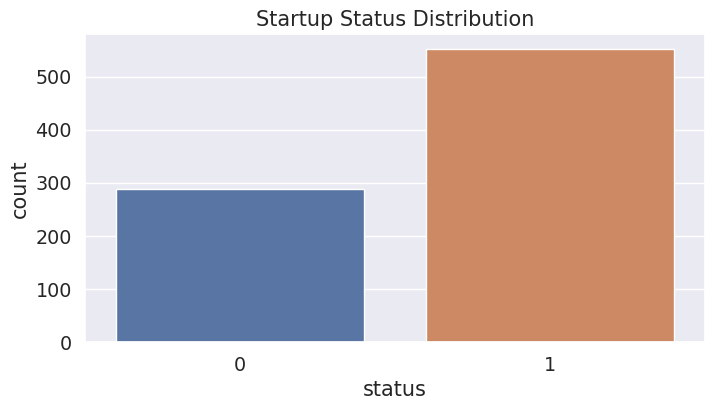

In [356]:
plt.figure(figsize=(8, 4))
sns.countplot(x='status', data=data)
plt.title('Startup Status Distribution')
plt.show()

### NB: Our target variable having unbalanced distribution so we'll handle it further using Smote technique 

In [357]:
data.head()

,state_code,latitude,longitude,zip_code,id,city,name,closed_at,age_first_funding_year,age_last_funding_year,...,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,startup_age,funding_duration
0,CA,42.358880,-71.056820,92101,c:6669,San Diego,Bandsintown,2014-01-01,2.2493,3.0027,...,1,0,0,0,0,1.0000,0,1,2557,275
1,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,TriCipher,2014-01-01,5.1260,9.9973,...,0,0,1,1,1,4.7500,1,1,5114,1778
2,CA,32.901049,-117.192656,92121,c:65620,San Diego,Plixi,2014-01-01,1.0329,1.0329,...,0,1,0,0,0,4.0000,1,1,1750,0
3,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Solidcore Systems,2014-01-01,3.1315,5.3151,...,0,0,1,1,1,3.3333,1,1,4383,797
4,CA,37.779281,-122.419236,94105,c:65806,San Francisco,Inhale Digital,2012-10-01,0.0000,1.6685,...,1,0,0,0,0,1.0000,1,0,1249,609


## Numerical Features 

In [393]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
data_num=data.select_dtypes(include=numeric)
data_num.head(3)

,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,...,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,startup_age,funding_duration
0,42.358880,-71.056820,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,...,1,0,0,0,0,1.00,0,1,2557,275
1,37.238916,-121.973718,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,...,0,0,1,1,1,4.75,1,1,5114,1778
2,32.901049,-117.192656,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,...,0,1,0,0,0,4.00,1,1,1750,0


In [394]:
numeric_features = data.select_dtypes(include=['float64', 'int64','int32']).columns
non_binary_numeric_features = [feature for feature in numeric_features if data[feature].nunique() > 2]



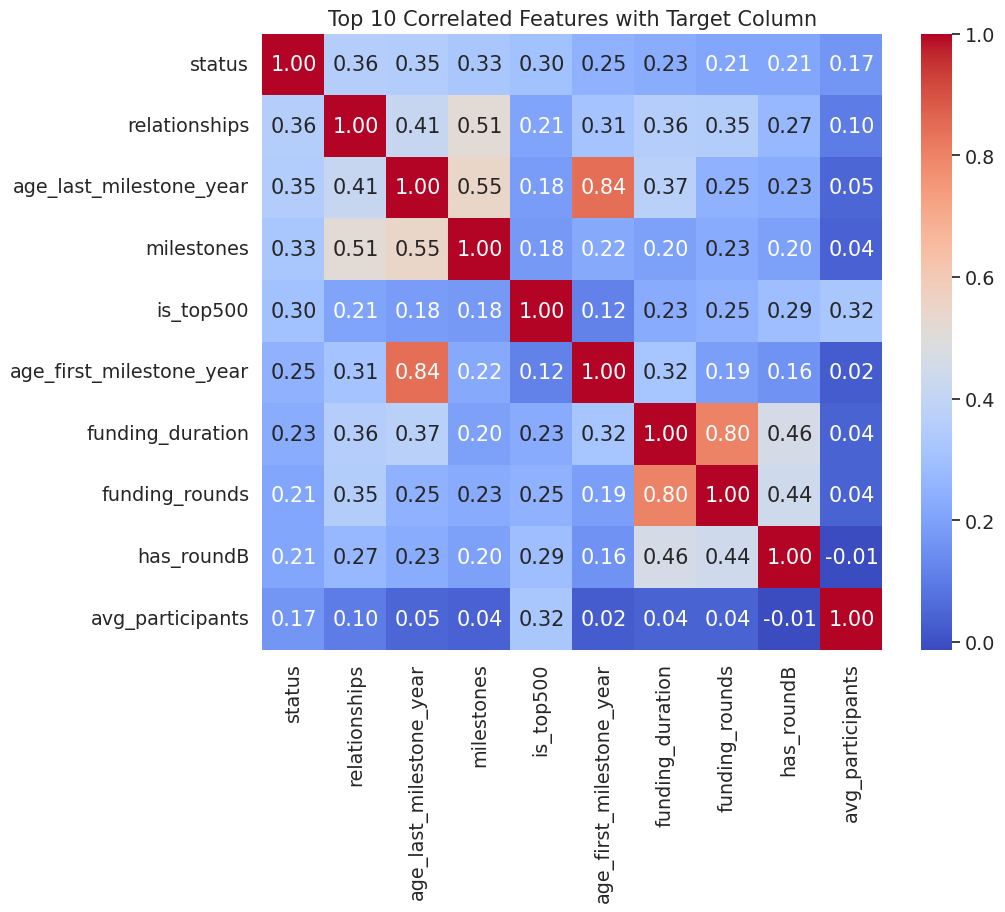

In [395]:
# Calculate correlation with target variable
correlation_with_target = data[numeric_features].corrwith(data['status']).abs().sort_values(ascending=False)

# Select top 10 features
top_10_correlated_features = correlation_with_target.head(10).index

# Step 2: Correlation analysis
correlation_matrix = data[top_10_correlated_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top 10 Correlated Features with Target Column')
plt.show()

The top features with the highest correlation to startup success (status) are:

- Relationships: Moderate positive correlation, indicating startups with more relationships tend to succeed.
- Age of Last Milestone Year: Strong positive correlation, suggesting startups achieving milestones later are more likely to succeed.
- Milestones: Positive correlation, implying that the number of milestones achieved relates to success.
- Top 500: Moderate positive correlation, indicating startups identified as top 500 have a higher chance of success.
- Funding Duration: Positive correlation, suggesting startups with longer funding durations tend to succeed more

In [396]:

describeNum = data_num[non_binary_numeric_features].describe()
describeNum.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,mean,std,min,25%,50%,75%,max
latitude,840.000000,38.410522,3.689577,25.752358,37.386778,37.779281,40.730646,59.335232
longitude,840.000000,-103.766293,21.862099,-122.756956,-122.187927,-118.355788,-77.381456,18.057121
age_first_funding_year,840.000000,2.423443,2.495400,0.000000,0.681525,1.656200,3.756875,21.895900
age_last_funding_year,840.000000,4.129826,2.937524,0.000000,1.917800,3.706800,5.719200,21.895900
age_first_milestone_year,840.000000,2.805180,2.846041,0.000000,0.328800,2.163000,4.164400,24.684900
age_last_milestone_year,840.000000,4.127501,3.403927,0.000000,1.045875,3.983550,6.230175,24.684900
relationships,840.000000,7.752381,7.280069,0.000000,3.000000,5.500000,10.000000,63.000000
funding_rounds,840.000000,2.320238,1.404427,1.000000,1.000000,2.000000,3.000000,10.000000
funding_total_usd,840.000000,27081347.529762,198685172.652385,11000.000000,3274245.250000,10535591.000000,25625000.000000,5700000000.000000
milestones,840.000000,1.820238,1.326298,0.000000,1.000000,2.000000,3.000000,8.000000


- Startup Age: The average age of startups in the dataset is approximately 3111.47 days (approximately 8.5 years), with a standard deviation of 1322.73 days (approximately 3.6 years).
- Funding Duration: The duration between the first and last funding rounds ranges from 0 to 3949 days, with an average duration of approximately 622.83 days.

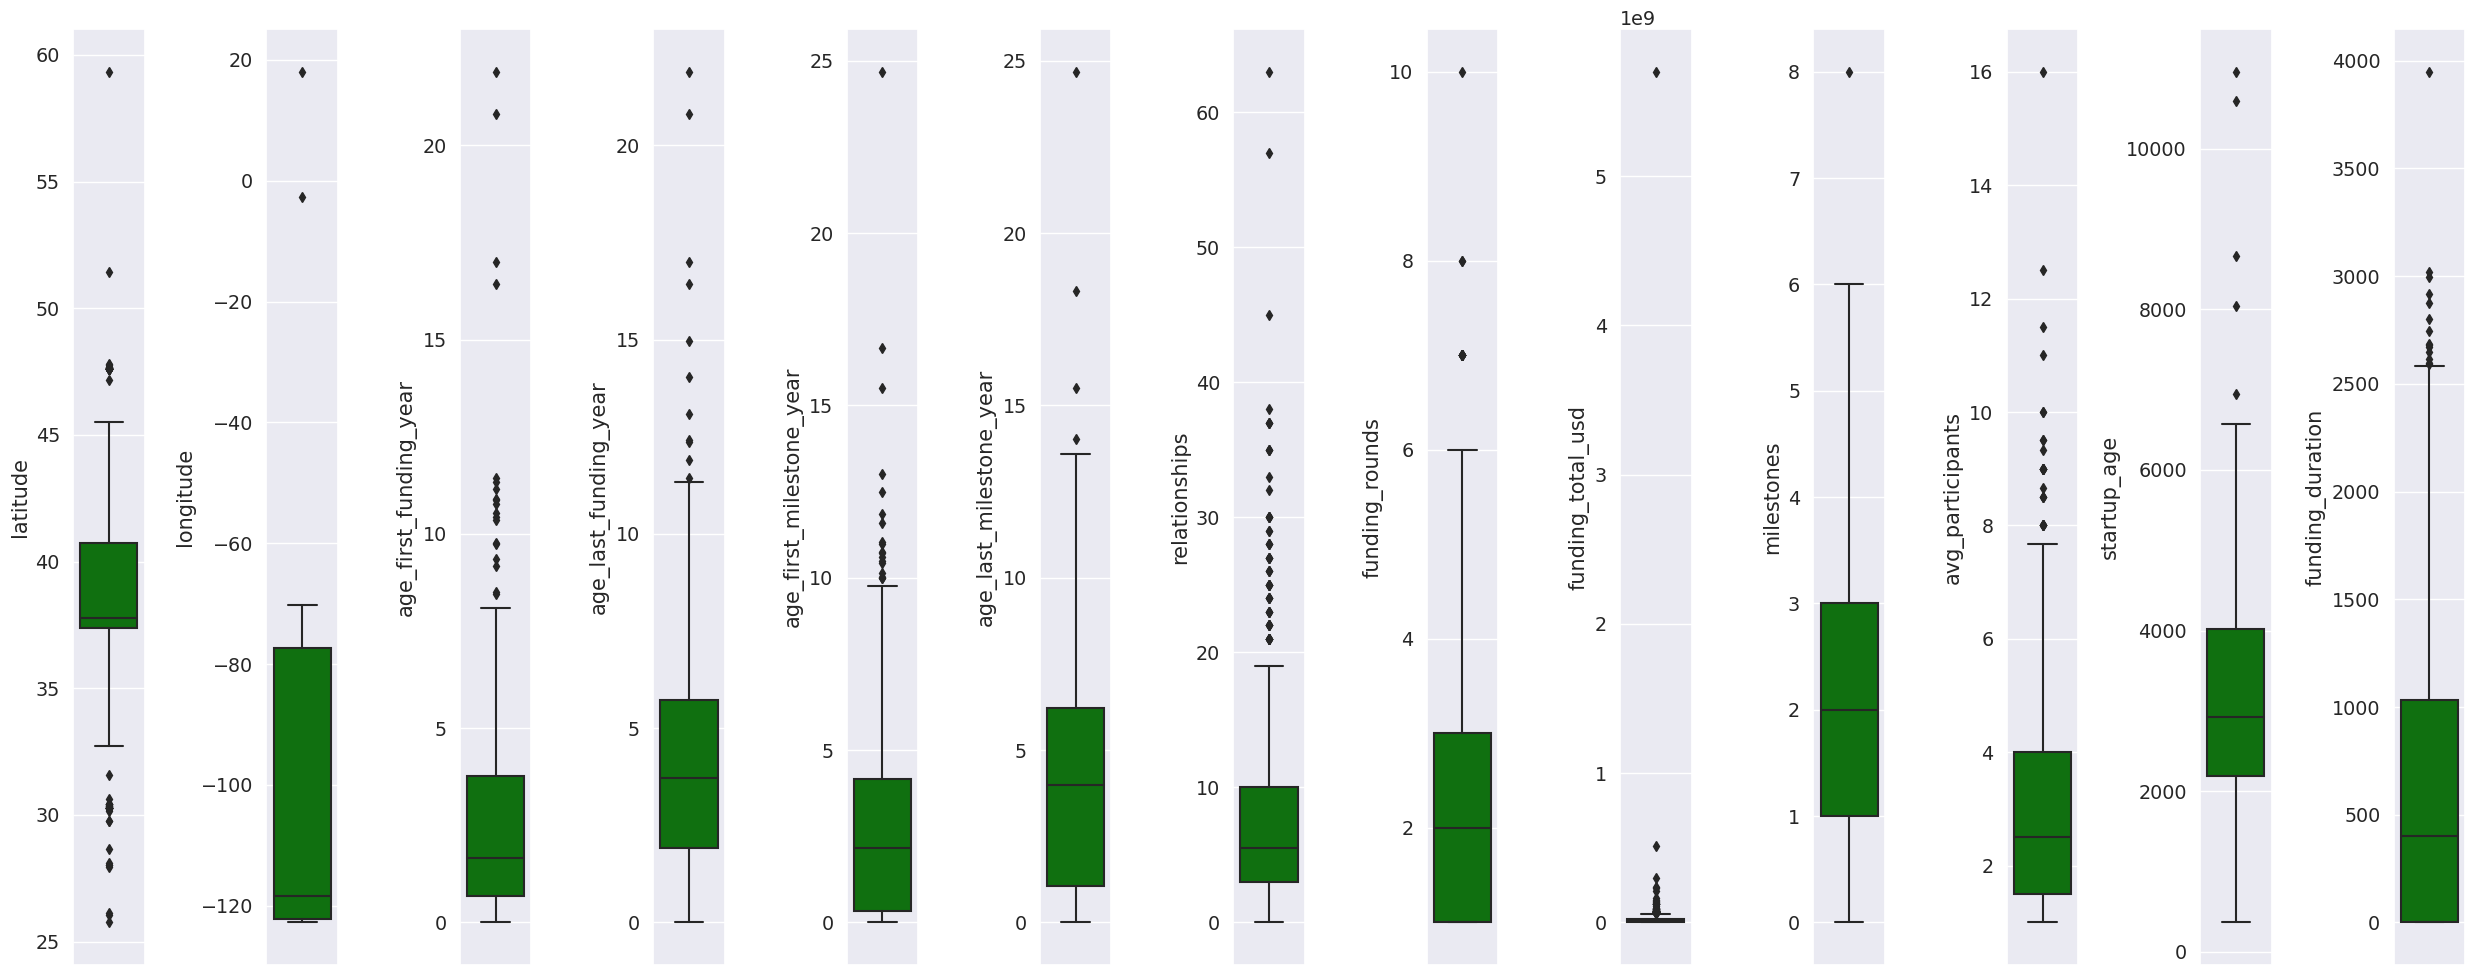

In [397]:
plt.figure(figsize=(25, 10))
for i in range(0, len(non_binary_numeric_features)):
    plt.subplot(1, len(non_binary_numeric_features), i+1)
    sns.boxplot(y=data[non_binary_numeric_features[i]], color='green', orient='v')
    plt.tight_layout()

## Outlier Handling

In [398]:
def handle_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    median = data[feature].median()
    data[feature] = np.where((data[feature] < lower_bound) | (data[feature] > upper_bound), median, data[feature])
    return data

for feature in non_binary_numeric_features:
    data = handle_outliers(data, feature)

print(data[non_binary_numeric_features].describe())

         latitude   longitude  age_first_funding_year  age_last_funding_year  \
count  840.000000  840.000000              840.000000             840.000000   
mean    38.374296 -104.066417                2.188481               3.980380   
std      2.538883   21.177739                1.937033               2.621756   
min     32.715400 -122.756956                0.000000               0.000000   
25%     37.402797 -122.187927                0.681525               1.917800   
50%     37.779281 -118.356379                1.651400               3.706800   
75%     40.603170  -77.408996                3.516425               5.598625   
max     45.520247  -70.144101                8.098600              11.334200   

       age_first_milestone_year  age_last_milestone_year  relationships  \
count                840.000000               840.000000     840.000000   
mean                   2.588461                 4.060114       6.292857   
std                    2.423303                 3.2507

#### Plotting After Outlier Handling

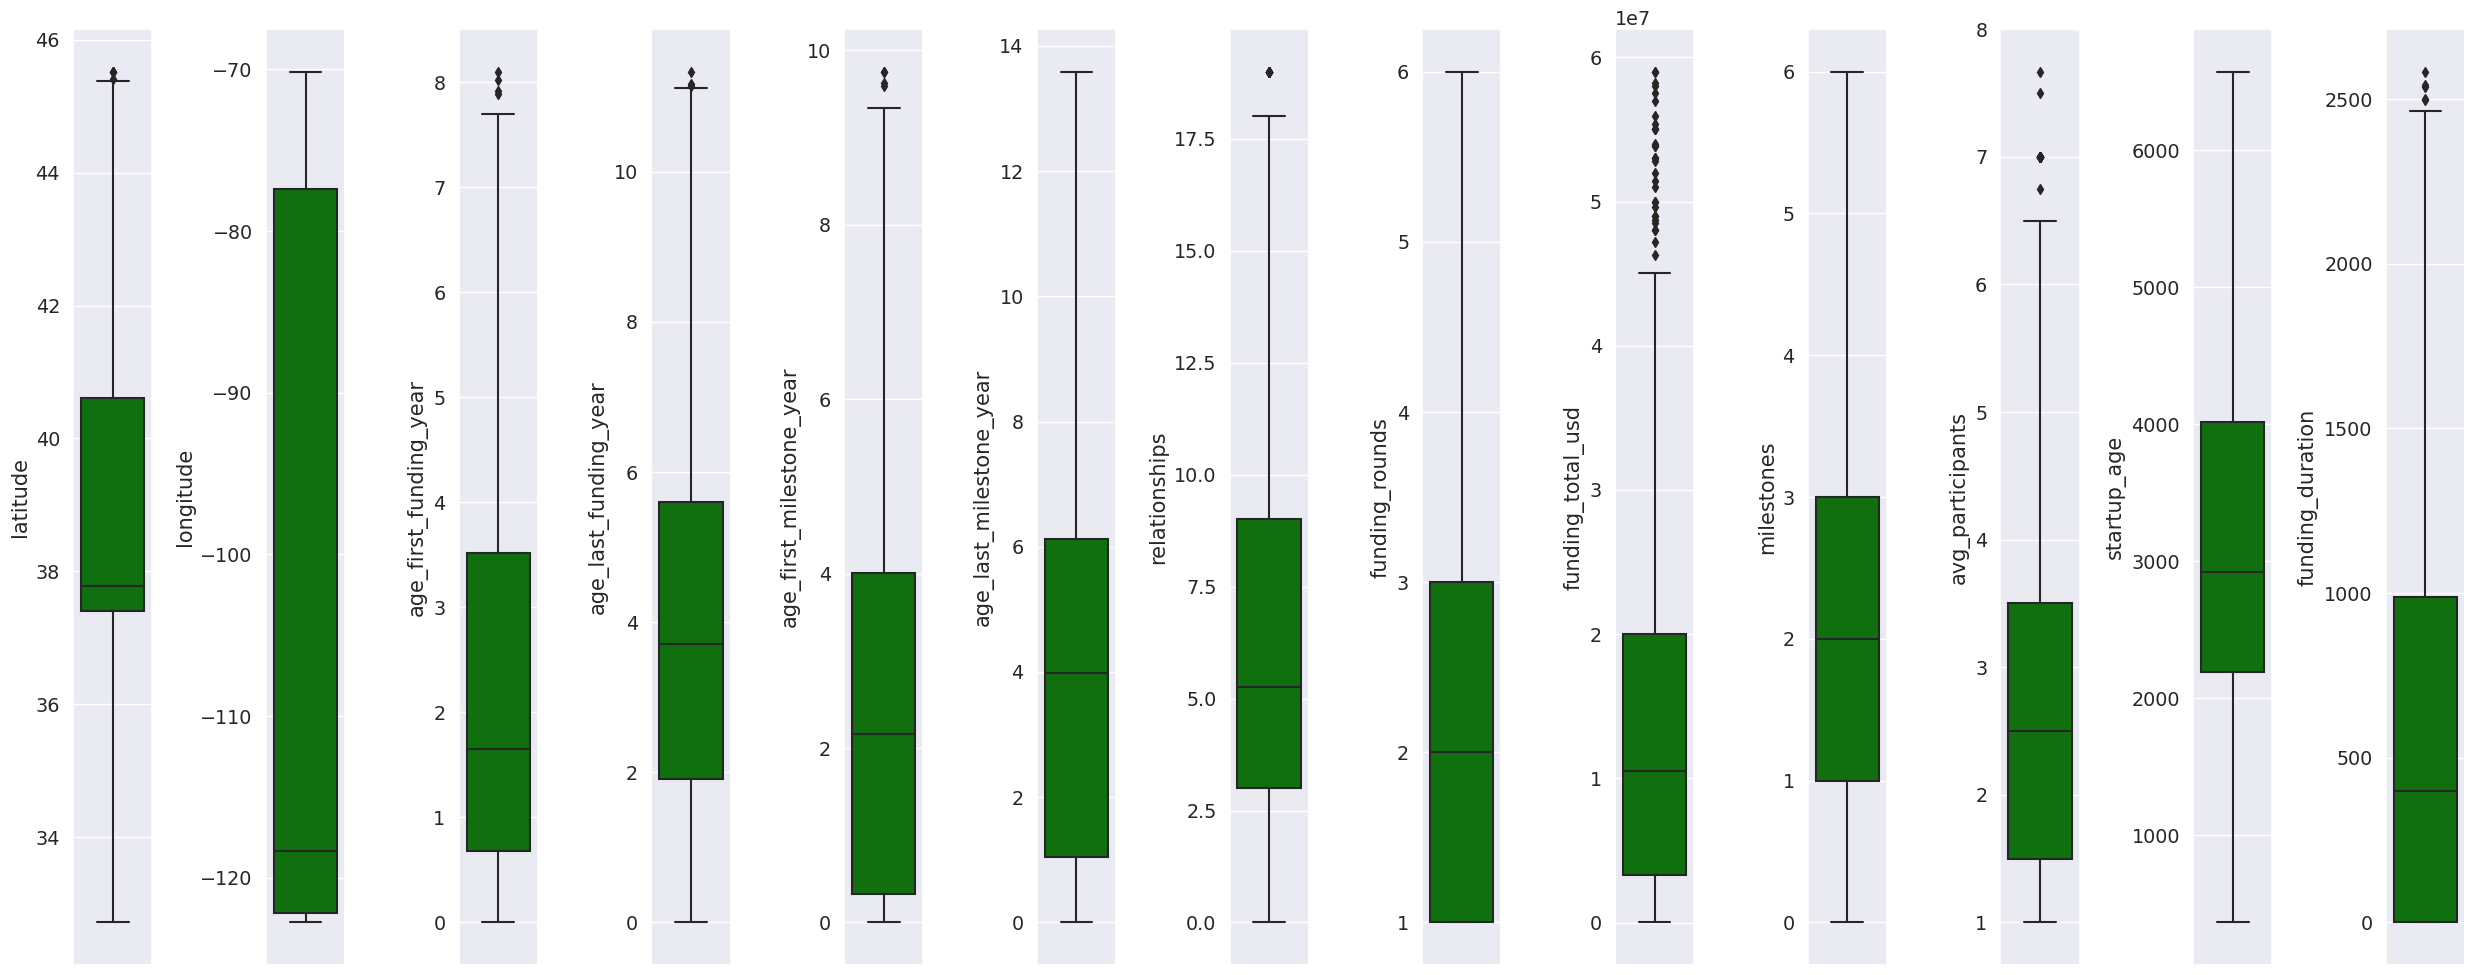

In [400]:
plt.figure(figsize=(25, 10))
for i in range(0, len(non_binary_numeric_features)):
    plt.subplot(1, len(non_binary_numeric_features), i+1)
    sns.boxplot(y=data[non_binary_numeric_features[i]], color='green', orient='v')
    plt.tight_layout()

In [365]:
correlations = data[numeric_features].corr()['status']  # Replace 'status' with your actual target column if different
low_correlation_filter = correlations[abs(correlations) < 0.1]  # Threshold can be adjusted
print("Low correlation features with target:", low_correlation_filter.index.tolist())


Low correlation features with target: ['latitude', 'longitude', 'age_first_funding_year', 'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC', 'has_angel', 'startup_age']


## Categorical Features

In [401]:
data_cat=data.select_dtypes(include='object')
data_cat.head(3)

,state_code,zip_code,id,city,name,category_code
0,CA,92101,c:6669,San Diego,Bandsintown,music
1,CA,95032,c:16283,Los Gatos,TriCipher,enterprise
2,CA,92121,c:65620,San Diego,Plixi,web


### Plotting to gain more infos about our Categorical Features

#### Which category has the largest number of startup ?

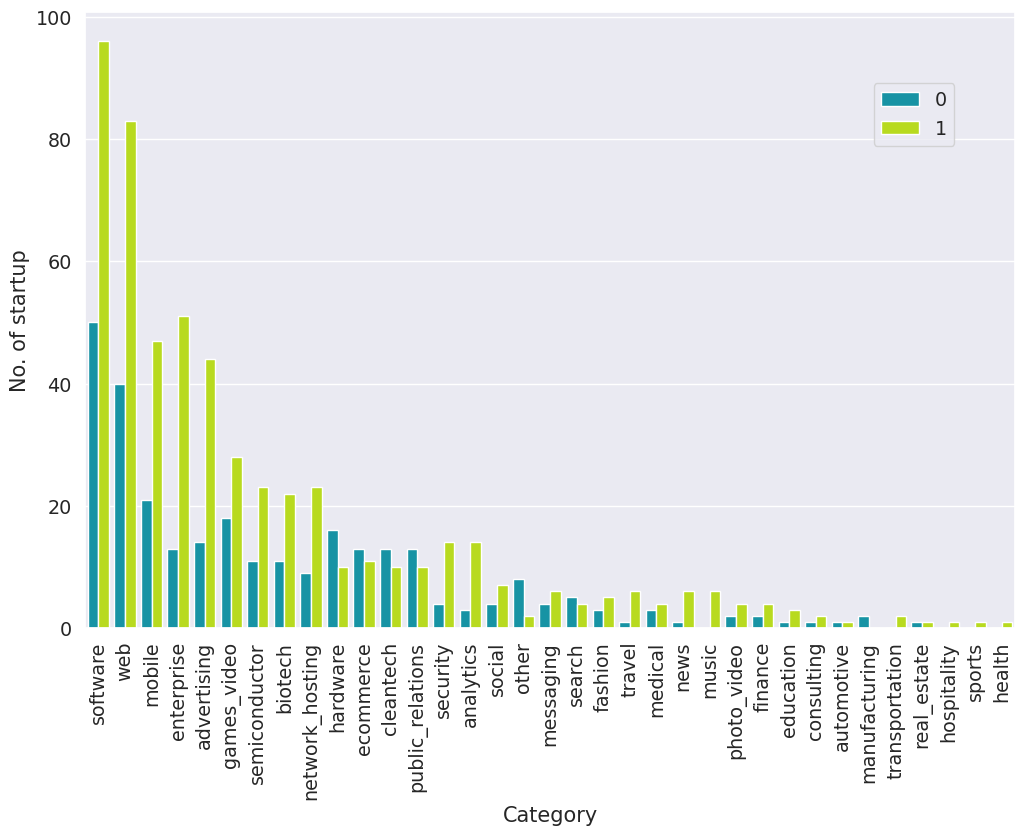

In [402]:
fig, ax = plt.subplots(figsize=(12,8))

_ = sns.countplot(x="category_code", hue="status", data=data, palette="nipy_spectral",
              order=data.category_code.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

#### Which category has the largest number Success Rate?


In [403]:
data1 = data[data['status']==1].groupby(['category_code']).agg({'status':'count'}).reset_index()
data1.columns=['category_code','total_success']

data2 = data[data['status']==0].groupby(['category_code']).agg({'status':'count'}).reset_index()
data2.columns=['category_code','total_closed']

data3=data.groupby(['category_code']).agg({'status':'count'}).reset_index()
data3.columns=['category_code','total_startup']

data1= data1.merge(data2, on='category_code')
data1= data1.merge(data3, on='category_code')

data1['success_rate']= round((data1['total_success'] / data1['total_startup']) * 100,2)

most_succes_rate = data1.sort_values('success_rate', ascending=False)
most_succes_rate

,category_code,total_success,total_closed,total_startup,success_rate
27,travel,6,1,7,85.71
17,news,6,1,7,85.71
1,analytics,14,3,17,82.35
8,enterprise,51,13,64,79.69
23,security,14,4,18,77.78
0,advertising,44,14,58,75.86
7,education,3,1,4,75.00
16,network_hosting,23,9,32,71.88
15,mobile,47,21,68,69.12
24,semiconductor,23,11,34,67.65


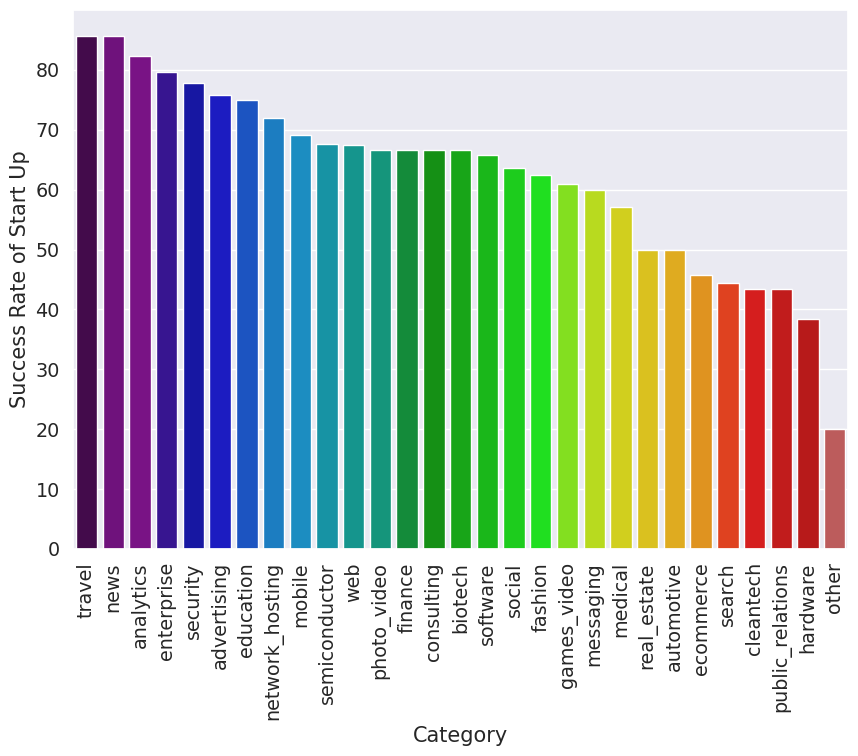

In [404]:
fig, ax = plt.subplots(figsize=(10,7))
_ = sns.barplot(x="category_code", y="success_rate", data=most_succes_rate,
                
                palette="nipy_spectral", ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="Success Rate of Start Up")

### Bivariant Testing

#### Chi-square test to examine the relationship between each categorical variable and the target variable


In [405]:
for col in data_cat:
    contingency_table = pd.crosstab(data[col], data['status'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"{col}: Chi-squared test result -- Chi2: {chi2}, p-value: {p}")

state_code: Chi-squared test result -- Chi2: 66.81529506469933, p-value: 0.0006552437028791582
zip_code: Chi-squared test result -- Chi2: 416.9627349241341, p-value: 0.017104582109696564
id: Chi-squared test result -- Chi2: 840.0, p-value: 0.4740485899177133
city: Chi-squared test result -- Chi2: 275.9825330978875, p-value: 0.0012988312205356033
name: Chi-squared test result -- Chi2: 840.0, p-value: 0.4740485899177133
category_code: Chi-squared test result -- Chi2: 60.10134208808454, p-value: 0.0037763157872844817


A low p-value (typically < 0.05) indicates that the differences in variable distributions between the categories are statistically significant, suggesting a potential influence on the target variable.

We'll drop 'id','zip_code' and 'name': These do not contribute predictive power to our model.

In [406]:
data=data.drop(columns=(['id','name','zip_code']))

# Features Engineering 

#### How many Startup have is_top500?


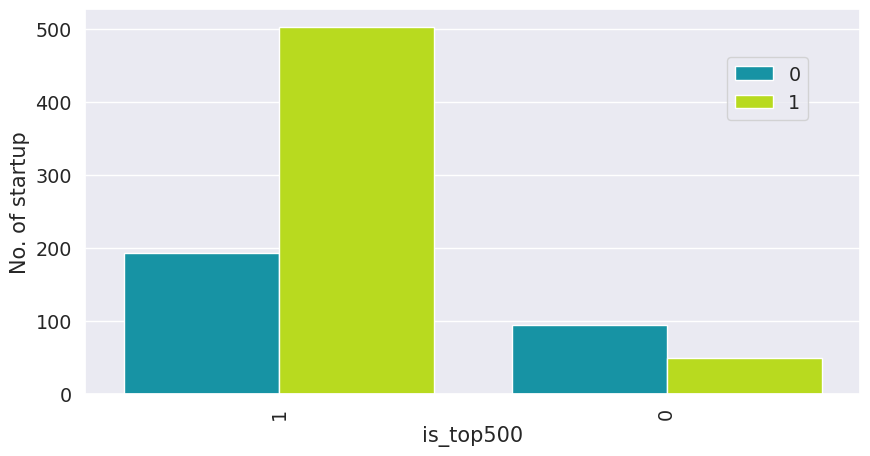

In [407]:
fig, ax = plt.subplots(figsize=(10,5))

_ = sns.countplot(x="is_top500", hue="status", data=data, palette="nipy_spectral",
              order=data.is_top500.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="is_top500", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

### New Colunms : Has_Round_ABCD,Has_Investor,Has_Seed,Tier_Relationships

In [408]:
data['has_RoundABCD'] = np.where((data['has_roundA'] == 1) | (data['has_roundB'] == 1) | (data['has_roundC'] == 1) | (data['has_roundD'] == 1), 1, 0)
data.head()

,state_code,latitude,longitude,city,closed_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,...,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,startup_age,funding_duration,has_RoundABCD
0,CA,42.358880,-71.056820,San Diego,2014-01-01,2.2493,3.0027,4.6685,6.7041,3.0,...,0,0,0,0,1.0000,0,1,2557.0,275.0,0
1,CA,37.238916,-121.973718,Los Gatos,2014-01-01,5.1260,9.9973,7.0055,7.0055,9.0,...,0,1,1,1,4.7500,1,1,5114.0,1778.0,1
2,CA,32.901049,-117.192656,San Diego,2014-01-01,1.0329,1.0329,1.4575,2.2055,5.0,...,1,0,0,0,4.0000,1,1,1750.0,0.0,1
3,CA,37.320309,-122.050040,Cupertino,2014-01-01,3.1315,5.3151,6.0027,6.0027,5.0,...,0,1,1,1,3.3333,1,1,4383.0,797.0,1
4,CA,37.779281,-122.419236,San Francisco,2012-10-01,0.0000,1.6685,0.0384,0.0384,2.0,...,0,0,0,0,1.0000,1,0,1249.0,609.0,0


In [409]:
len(data[(data["has_RoundABCD"] == 1)].index)


636

In [410]:
data['has_Investor'] = np.where((data['has_VC'] == 1) | (data['has_angel'] == 1), 1, 0)

data.head()

,state_code,latitude,longitude,city,closed_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,...,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,startup_age,funding_duration,has_RoundABCD,has_Investor
0,CA,42.358880,-71.056820,San Diego,2014-01-01,2.2493,3.0027,4.6685,6.7041,3.0,...,0,0,0,1.0000,0,1,2557.0,275.0,0,1
1,CA,37.238916,-121.973718,Los Gatos,2014-01-01,5.1260,9.9973,7.0055,7.0055,9.0,...,1,1,1,4.7500,1,1,5114.0,1778.0,1,1
2,CA,32.901049,-117.192656,San Diego,2014-01-01,1.0329,1.0329,1.4575,2.2055,5.0,...,0,0,0,4.0000,1,1,1750.0,0.0,1,0
3,CA,37.320309,-122.050040,Cupertino,2014-01-01,3.1315,5.3151,6.0027,6.0027,5.0,...,1,1,1,3.3333,1,1,4383.0,797.0,1,0
4,CA,37.779281,-122.419236,San Francisco,2012-10-01,0.0000,1.6685,0.0384,0.0384,2.0,...,0,0,0,1.0000,1,0,1249.0,609.0,0,1


In [411]:
len(data[(data["has_Investor"] == 1)].index)

439

In [412]:
data['has_Seed'] = np.where((data['has_RoundABCD'] == 0) & (data['has_Investor'] == 1), 1, 0)
data.head()

,state_code,latitude,longitude,city,closed_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,...,has_roundC,has_roundD,avg_participants,is_top500,status,startup_age,funding_duration,has_RoundABCD,has_Investor,has_Seed
0,CA,42.358880,-71.056820,San Diego,2014-01-01,2.2493,3.0027,4.6685,6.7041,3.0,...,0,0,1.0000,0,1,2557.0,275.0,0,1,1
1,CA,37.238916,-121.973718,Los Gatos,2014-01-01,5.1260,9.9973,7.0055,7.0055,9.0,...,1,1,4.7500,1,1,5114.0,1778.0,1,1,0
2,CA,32.901049,-117.192656,San Diego,2014-01-01,1.0329,1.0329,1.4575,2.2055,5.0,...,0,0,4.0000,1,1,1750.0,0.0,1,0,0
3,CA,37.320309,-122.050040,Cupertino,2014-01-01,3.1315,5.3151,6.0027,6.0027,5.0,...,1,1,3.3333,1,1,4383.0,797.0,1,0,0
4,CA,37.779281,-122.419236,San Francisco,2012-10-01,0.0000,1.6685,0.0384,0.0384,2.0,...,0,0,1.0000,1,0,1249.0,609.0,0,1,1


In [413]:
len(data[(data["has_Seed"] == 1)].index)

179

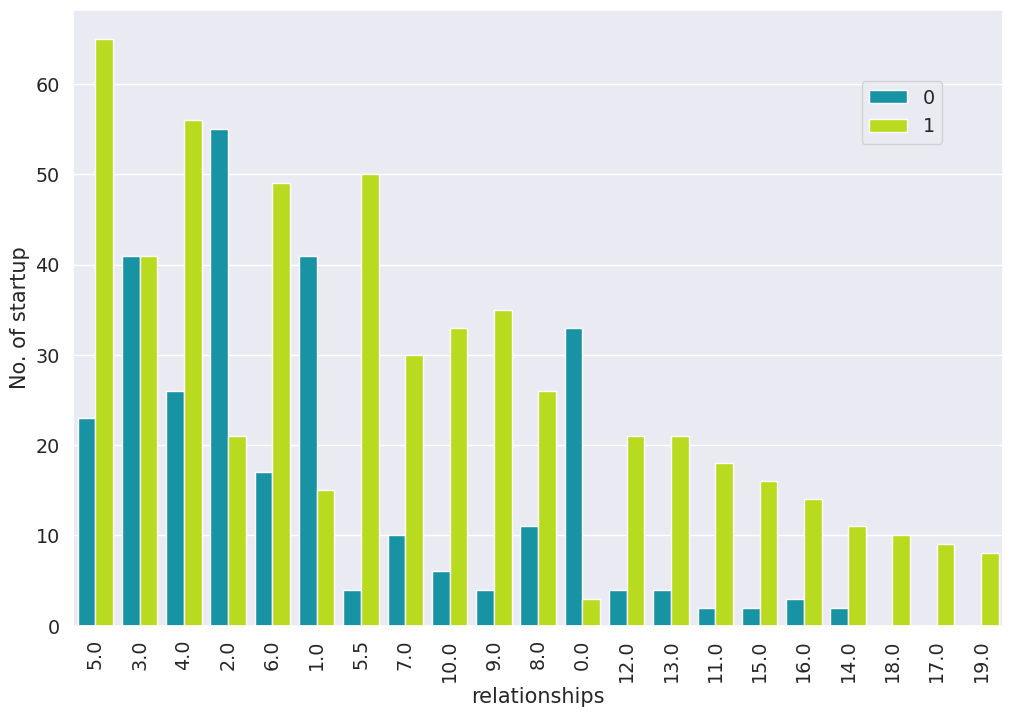

In [414]:
fig, ax = plt.subplots(figsize=(12,8))

_ = sns.countplot(x="relationships", hue="status", data=data, palette="nipy_spectral",
              order=data.relationships.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="relationships", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

In [415]:
# create a list of our conditions
conditions = [
    (data['relationships'] <= 5),
    (data['relationships'] > 5) & (data['relationships'] <= 10),
    (data['relationships'] > 10) & (data['relationships'] <= 16),
    (data['relationships'] > 16)
    ]

# create a list of the values we want to assign for each condition
values = ['4', '3', '2', '1']

# create a new column and use np.select to assign values to it using our lists as arguments
data['tier_relationships'] = np.select(conditions, values)

# display updated DataFrame
data.head()

,state_code,latitude,longitude,city,closed_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,...,has_roundD,avg_participants,is_top500,status,startup_age,funding_duration,has_RoundABCD,has_Investor,has_Seed,tier_relationships
0,CA,42.358880,-71.056820,San Diego,2014-01-01,2.2493,3.0027,4.6685,6.7041,3.0,...,0,1.0000,0,1,2557.0,275.0,0,1,1,4
1,CA,37.238916,-121.973718,Los Gatos,2014-01-01,5.1260,9.9973,7.0055,7.0055,9.0,...,1,4.7500,1,1,5114.0,1778.0,1,1,0,3
2,CA,32.901049,-117.192656,San Diego,2014-01-01,1.0329,1.0329,1.4575,2.2055,5.0,...,0,4.0000,1,1,1750.0,0.0,1,0,0,4
3,CA,37.320309,-122.050040,Cupertino,2014-01-01,3.1315,5.3151,6.0027,6.0027,5.0,...,1,3.3333,1,1,4383.0,797.0,1,0,0,4
4,CA,37.779281,-122.419236,San Francisco,2012-10-01,0.0000,1.6685,0.0384,0.0384,2.0,...,0,1.0000,1,0,1249.0,609.0,0,1,1,4


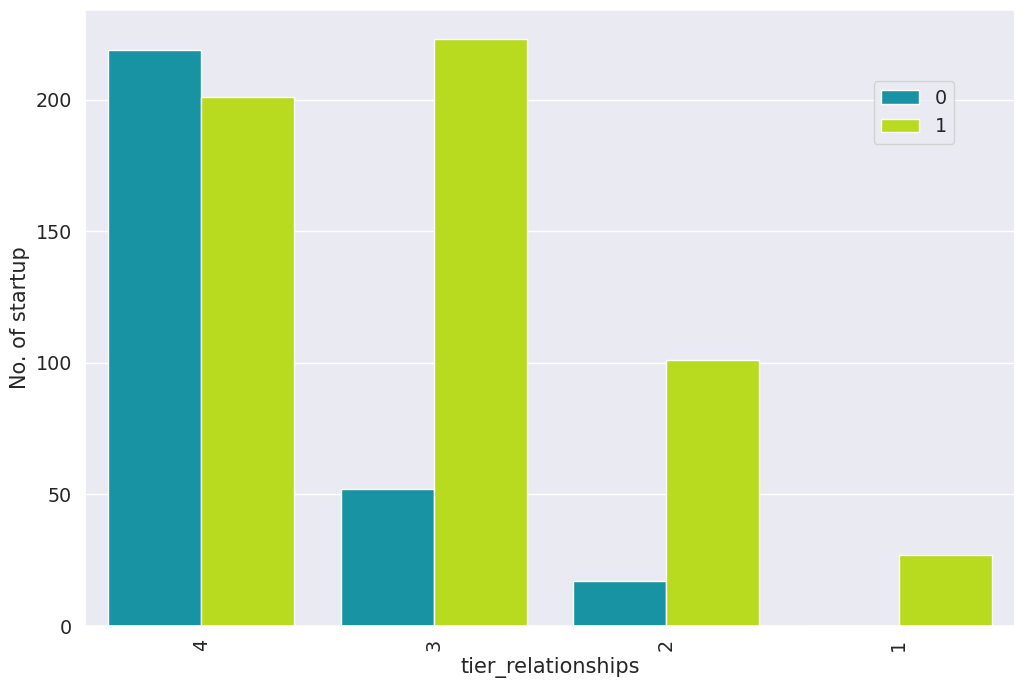

In [416]:
fig, ax = plt.subplots(figsize=(12,8))

_ = sns.countplot(x="tier_relationships", hue="status", data=data, palette="nipy_spectral",
              order=data.tier_relationships.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="tier_relationships", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

In [417]:
data=data.drop(columns=(['relationships','latitude','city','longitude','closed_at']))

In [418]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 840 entries, 0 to 922
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state_code                840 non-null    object 
 1   age_first_funding_year    840 non-null    float64
 2   age_last_funding_year     840 non-null    float64
 3   age_first_milestone_year  840 non-null    float64
 4   age_last_milestone_year   840 non-null    float64
 5   funding_rounds            840 non-null    float64
 6   funding_total_usd         840 non-null    float64
 7   milestones                840 non-null    float64
 8   is_CA                     840 non-null    int64  
 9   is_NY                     840 non-null    int64  
 10  is_MA                     840 non-null    int64  
 11  is_TX                     840 non-null    int64  
 12  is_otherstate             840 non-null    int64  
 13  category_code             840 non-null    object 
 14  is_software    

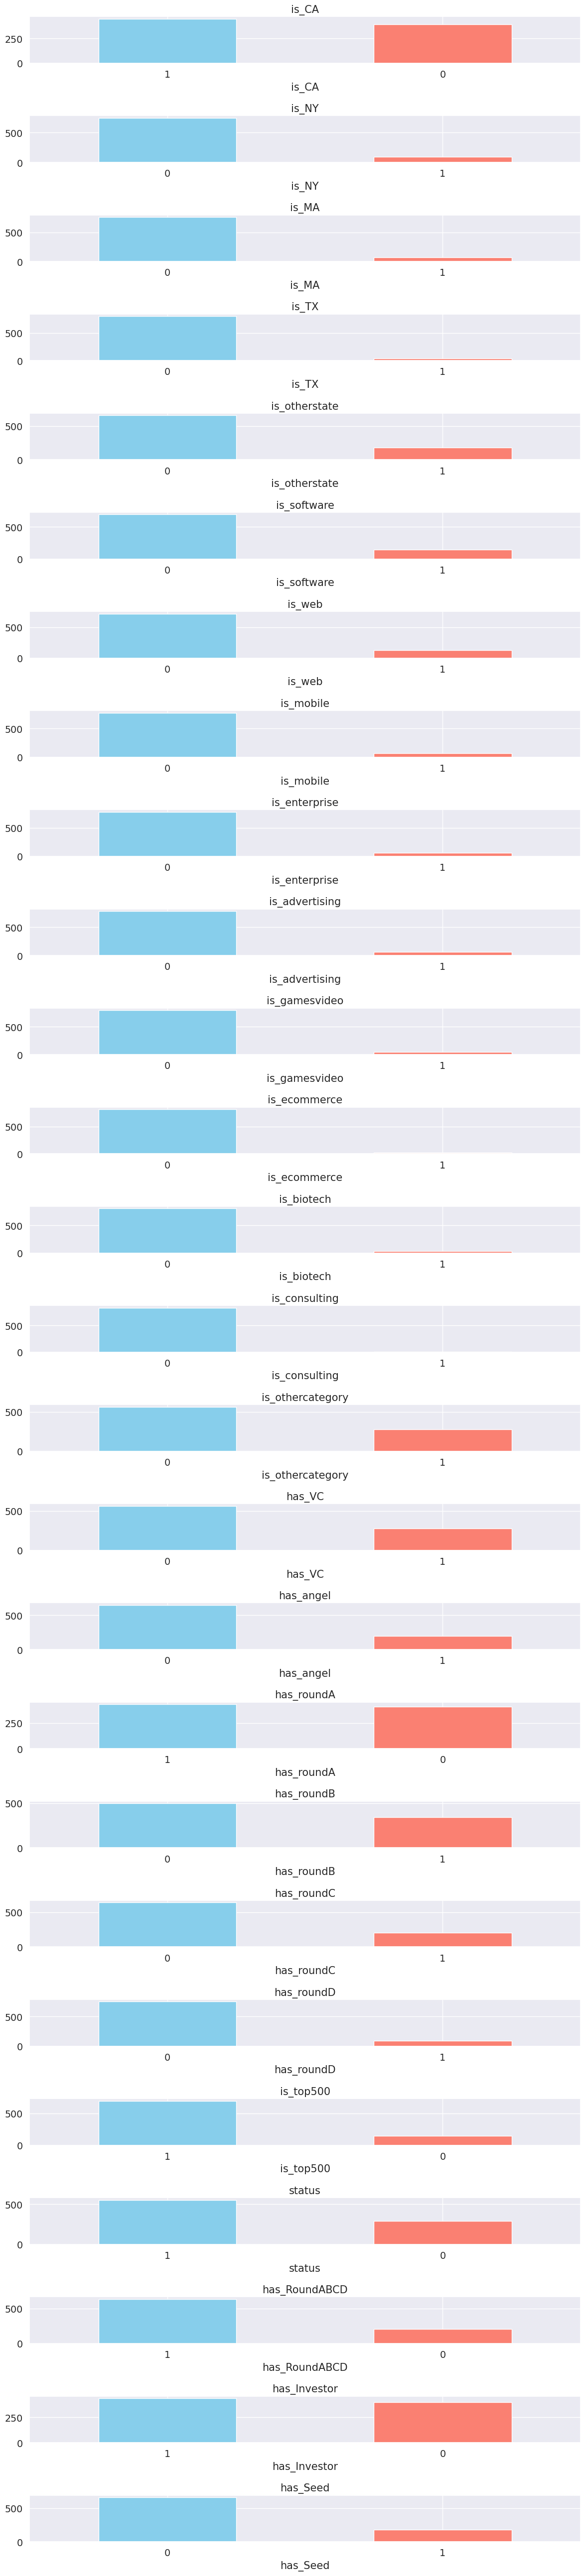

In [419]:

binary_features = [col for col in data.columns if data[col].dropna().value_counts().index.isin([0, 1]).all()]

plt.figure(figsize=(12, len(binary_features) * 2))  # Adjust size accordingly
for i, feature in enumerate(binary_features, 1):
    plt.subplot(len(binary_features), 1, i)
    data[feature].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
    plt.title(feature)
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

### Encoding Categorical Columns

In [432]:
df=data.copy()

In [433]:
categorical_cols = ['state_code', 'category_code', 'tier_relationships']  

numeric_cols = [col for col in df.columns if col not in categorical_cols + ['status']]  


In [434]:
# Create an imputer object for handling missing categorical data
imputer = SimpleImputer(strategy='most_frequent')

# Apply imputer to the categorical columns to fill missing values before encoding
df[categorical_cols] = imputer.fit_transform(df[categorical_cols])

encoder = OneHotEncoder(sparse=False)

encoded_data = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols), index=df.index)

encoded_df.fillna(0, inplace=True)

df = df.drop(categorical_cols, axis=1).join(encoded_df)

# Check if there are any remaining missing values in the newly formed DataFrame
if df.isnull().sum().any():
    print("There are still missing values in the DataFrame.")
else:
    print("No missing values in the DataFrame. Proceed with further processing.")

# Optional: Verify the merged data to see how it looks
print(df.head())


No missing values in the DataFrame. Proceed with further processing.
   age_first_funding_year  age_last_funding_year  age_first_milestone_year  \
0                  2.2493                 3.0027                    4.6685   
1                  5.1260                 9.9973                    7.0055   
2                  1.0329                 1.0329                    1.4575   
3                  3.1315                 5.3151                    6.0027   
4                  0.0000                 1.6685                    0.0384   

   age_last_milestone_year  funding_rounds  funding_total_usd  milestones  \
0                   6.7041             3.0           375000.0         3.0   
1                   7.0055             4.0         40100000.0         1.0   
2                   2.2055             1.0          2600000.0         2.0   
3                   6.0027             3.0         40000000.0         1.0   
4                   0.0384             2.0          1300000.0         1.0   


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Standarization


In [435]:
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

### SMOTE : to handle the unbalance of our data  

In [436]:
X = df.drop('status', axis=1)
y = df['status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [437]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE and apply to training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


### Features Selection using SelectKBest technique

In [438]:
from sklearn.feature_selection import SelectKBest, f_classif

# Apply SelectKBest to select top k features based on the ANOVA F-value
selector = SelectKBest(f_classif, k=10)  # Choose k based on your preference or analysis
X_train_selected = selector.fit_transform(X_train_smote, y_train_smote)
X_test_selected = selector.transform(X_test)  # Transform test data

# Get the selected feature names
features_selected = X_train.columns[selector.get_support()]
print("Selected features:", features_selected)


Selected features: Index(['age_first_milestone_year', 'age_last_milestone_year', 'funding_rounds',
       'milestones', 'has_roundB', 'is_top500', 'funding_duration',
       'has_RoundABCD', 'has_Seed', 'tier_relationships_4'],
      dtype='object')


/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [56 57 69 84] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Best parameters for Logistic Regression: {'C': 0.01, 'penalty': 'l2'}
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10}
Best parameters for Random Forest: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


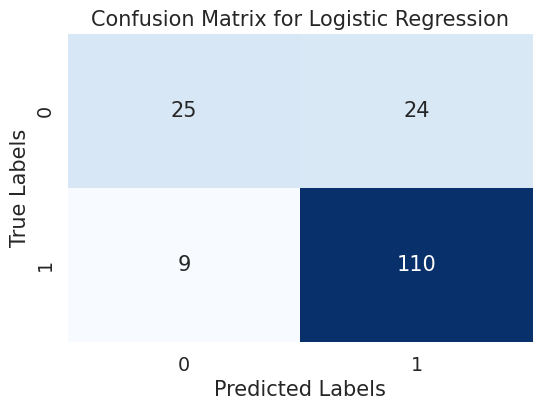

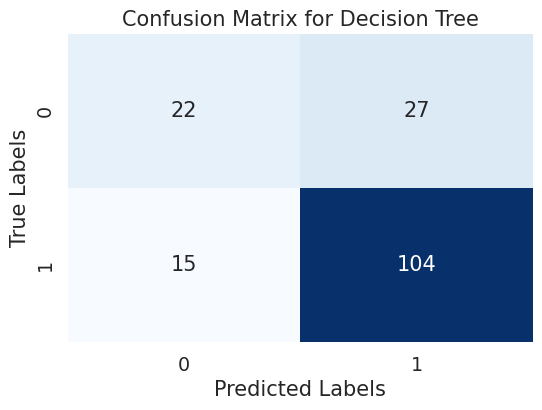

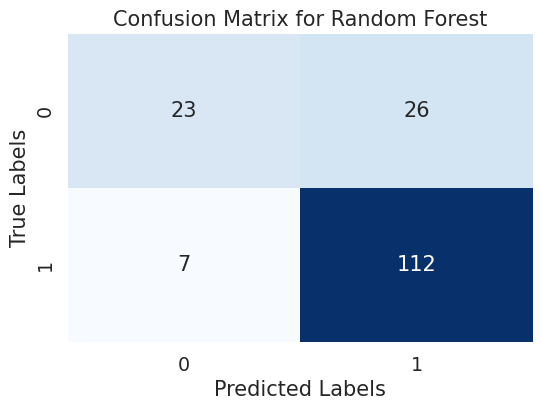

Logistic Regression performance:
              precision    recall  f1-score   support

           0       0.74      0.51      0.60        49
           1       0.82      0.92      0.87       119

    accuracy                           0.80       168
   macro avg       0.78      0.72      0.74       168
weighted avg       0.80      0.80      0.79       168

Decision Tree performance:
              precision    recall  f1-score   support

           0       0.59      0.45      0.51        49
           1       0.79      0.87      0.83       119

    accuracy                           0.75       168
   macro avg       0.69      0.66      0.67       168
weighted avg       0.74      0.75      0.74       168

Random Forest performance:
              precision    recall  f1-score   support

           0       0.77      0.47      0.58        49
           1       0.81      0.94      0.87       119

    accuracy                           0.80       168
   macro avg       0.79      0.71      0.

In [440]:

# Define the hyperparameters and their ranges for each model
param_grid_logistic = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

param_grid_decision_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50]
}

param_grid_random_forest = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search for each model
grid_search_logistic = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid_logistic, cv=5)
grid_search_logistic.fit(X_train, y_train)

grid_search_decision_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_decision_tree, cv=5)
grid_search_decision_tree.fit(X_train, y_train)

grid_search_random_forest = GridSearchCV(RandomForestClassifier(), param_grid_random_forest, cv=5)
grid_search_random_forest.fit(X_train, y_train)

# Evaluate the tuned models
print("Best parameters for Logistic Regression:", grid_search_logistic.best_params_)
print("Best parameters for Decision Tree:", grid_search_decision_tree.best_params_)
print("Best parameters for Random Forest:", grid_search_random_forest.best_params_)

# Evaluate performance on test set
logistic_preds = grid_search_logistic.predict(X_test)
decision_tree_preds = grid_search_decision_tree.predict(X_test)
random_forest_preds = grid_search_random_forest.predict(X_test)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Plotting confusion matrices
plot_confusion_matrix(confusion_matrix(y_test, logistic_preds), "Logistic Regression")
plot_confusion_matrix(confusion_matrix(y_test, decision_tree_preds), "Decision Tree")
plot_confusion_matrix(confusion_matrix(y_test, random_forest_preds), "Random Forest")

# Print classification reports
print("Logistic Regression performance:")
print(classification_report(y_test, logistic_preds))
print("Decision Tree performance:")
print(classification_report(y_test, decision_tree_preds))
print("Random Forest performance:")
print(classification_report(y_test, random_forest_preds))



## Summary of Model Evaluations for Startup Success Prediction


### Confusion Matrix Analysis


#### Logistic Regression:
- True Negatives (TN): 25
- True Positives (TP): 110
- False Positives (FP): 24
- False Negatives (FN): 9
The model exhibits a strong ability to identify true positives, crucial for not missing out on potentially successful startups.

#### Decision Tree:
- True Negatives (TN): 22
- True Positives (TP): 104
- False Positives (FP): 27
- False Negatives (FN): 15
This model shows balanced sensitivity but at the cost of a higher false positive rate.

#### Random Forest:
- True Negatives (TN): 23
- True Positives (TP): 112
- False Positives (FP): 26
- False Negatives (FN): 7
Best performance in minimizing false negatives, making it the best model for capturing potential successes.

Random Forest outperformed the other models in recall (0.94) for the positive class, making it highly effective at identifying successful startups. However, its precision (0.81) indicates it also misclassifies some negative cases as positive.

#### Precision /Recall trade-off
The Random Forest model, despite having the highest overall precision (80%) and recall (94%), exhibits a precision trade-off. The model's tendency to identify more cases as successful (high recall) also leads to more instances of incorrectly predicting failure as success (lower precision).

NB : This model is particularly suited for investors or incubators where missing out on a potential success could mean significant lost opportunity.